# Homework Data Visualization (DS8)

- Nama: Fahrizan Rasyad
- Cita-cita semasa kecil: Pembalap Motocross

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [7]:
# read your data

df = pd.read_csv('csv/telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

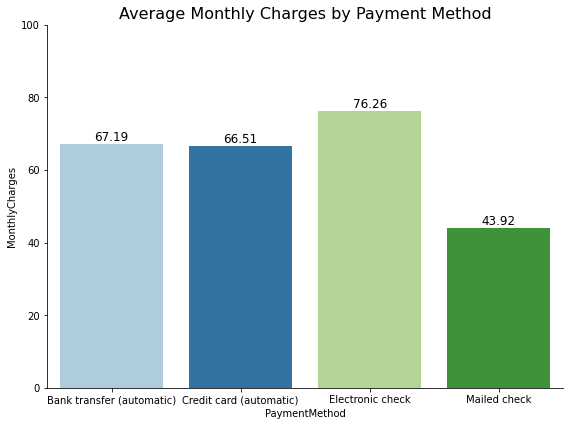

In [759]:
# your code goes here!

dfcustomer = pd.DataFrame(df.customerID.unique())
# Asumsi : setiap customer ID hanya memiliki satu payment menthod

df_PaymentMethod = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index() # agregasi monthlycharge

x = df_PaymentMethod['PaymentMethod']
y = df_PaymentMethod['MonthlyCharges'].round(2)

plt.figure(figsize=(8,6)) # ukuran figure
plt.bar(x=x, height=y) 
sns.barplot(x = 'PaymentMethod', y= 'MonthlyCharges', palette='Paired',data=df_PaymentMethod) # barplot
sns.despine()

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+1, s = str(y[i]), size = 12, ha='center') # data points

plt.ylim(0, 100) # limit sumbu y
plt.title('Average Monthly Charges by Payment Method', fontsize = 16) # nama figure
plt.tight_layout(pad=1.0); # nama di sumbu x berjarak

Jadi, dari plot di atas, dapat disimpulkan bahwa pelanggan dengan payment method electronic check (76,26 dollar) memiliki rata-rata monthlycharges paling tinggi disusul bank transfer, credit card dan mailed check yang terkecil dengan nilai rata-rata 43,92 dollar

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

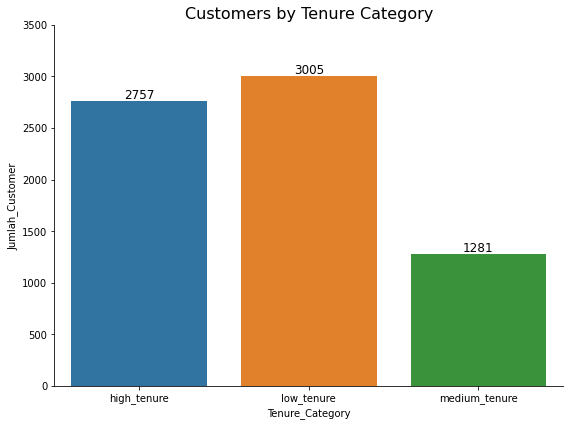

In [773]:
# your code goes here!

df = pd.read_csv('csv/telco_customer.csv')
#df.head()

dfcustomer = pd.DataFrame(df.customerID.unique())
# Asumsi : setiap customer ID hanya memiliki satu payment menthod

def segment(x):
    if x['tenure'] > 40:
        segment = 'high_tenure'
    elif x['tenure'] >21  and x['tenure'] < 40:
        segment = 'medium_tenure'
    else:
        segment = 'low_tenure'
    return segment 

df['Tenure_Category'] = df.apply(lambda x: segment(x), axis=1) # pembagian kategori tenure

Additional = [1] * 7043
df['Jumlah_Customer'] = Additional # kolom baru agar dapat diagregeasi dengan kategori tenure

df_Tenure = df.groupby('Tenure_Category')['Jumlah_Customer'].sum().reset_index()

plt.figure(figsize=(8,6)) # ukuran figure
plt.bar(x=x, height=y) 
sns.barplot(x = 'Tenure_Category', y= 'Jumlah_Customer', data=df_Tenure) # barplot
sns.despine()

x = df_Tenure['Tenure_Category']
y = df_Tenure['Jumlah_Customer']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+25, s = str(y[i]), size = 12, ha='center') # data points

plt.ylim(0, 3500) # limit sumbu y
plt.title('Customers by Tenure Category', fontsize = 16) # nama figure
plt.tight_layout(pad=1.0); # nama di sumbu x berjarak

Jadi, dari plot di atas, kami menyimpulkan bahwa kebanyakan customer merupakan low_tenure, sementara jumlah customer yang high_tenure hanya berselisih 248 customer dari low_tenure. Medium_tenure merupakan kategori yang paling rendah

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya




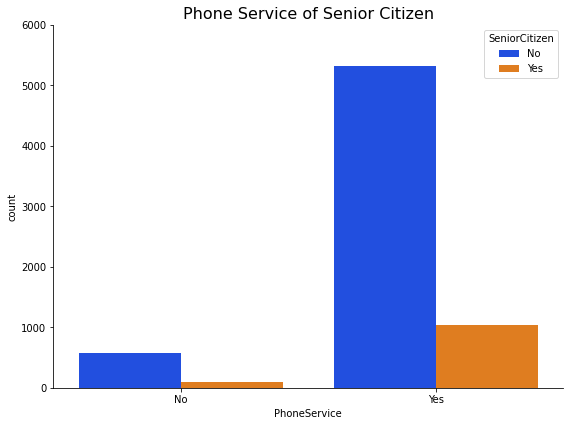

In [768]:
# your code goes here!

df = pd.read_csv('csv/telco_customer.csv')
df.head()

dfcustomer = pd.DataFrame(df.customerID.unique())
# Asumsi : setiap customer ID hanya memiliki satu payment menthod

df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})
df

plt.figure(figsize=(8,6))
sns.countplot(x='PhoneService', data=df, hue='SeniorCitizen', palette='bright')
sns.despine()

plt.ylim(0, 6000) # limit sumbu y
plt.title('Phone Service of Senior Citizen', fontsize = 16) # nama figure
plt.tight_layout(pad=1.0); # nama di sumbu x berjarak

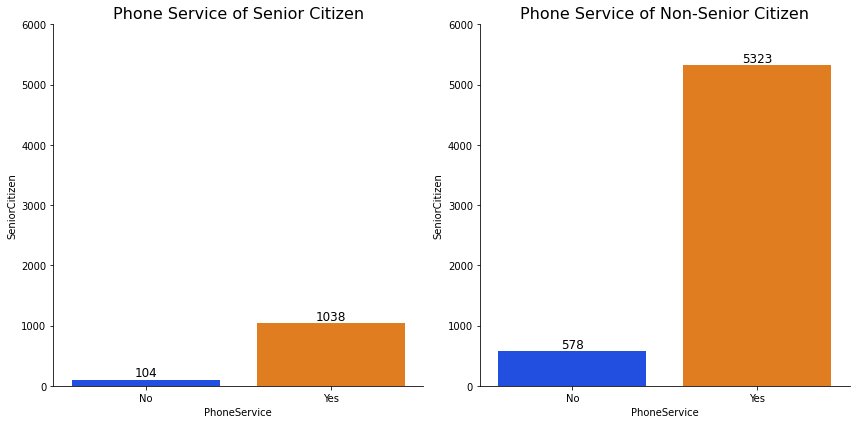

In [775]:
df = pd.read_csv('csv/telco_customer.csv')
df.head()

df_Phone = df.groupby('PhoneService')['customerID'].count().reset_index()
df_Phone

df_SeniorCitizen0 = df[~ (df['SeniorCitizen'] == 1)]
df_SeniorCitizen0

df_PhoneSeniorN = df_SeniorCitizen0.groupby('PhoneService')['SeniorCitizen'].count().reset_index()
df_PhoneSeniorN # Senior Citizen yang tidak berlangganan phone service

df_Phone = df.groupby('PhoneService')['customerID'].count().reset_index()
df_Phone

df_SeniorCitizen1 = df[~ (df['SeniorCitizen'] == 0)]
df_SeniorCitizen1

df_PhoneSeniorY = df_SeniorCitizen1.groupby('PhoneService')['SeniorCitizen'].count().reset_index()
df_PhoneSeniorY # Senior Citizen yang berlangganan phone service

plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # agar bar plot bersebelahan
sns.barplot(x='PhoneService', y='SeniorCitizen', data=df_PhoneSeniorY, palette='bright')
sns.despine()

x = df_PhoneSeniorY['PhoneService']
y = df_PhoneSeniorY['SeniorCitizen']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+50, s = str(y[i]), size = 12, ha='center') # data points

plt.ylim(0, 6000) # limit sumbu y
plt.title('Phone Service of Senior Citizen', fontsize = 16) # nama figure
plt.tight_layout(); # nama di sumbu x berjarak

plt.subplot(1,2,2) # agar bar plot bersebelahan
sns.barplot(x='PhoneService', y='SeniorCitizen', data=df_PhoneSeniorN, palette='bright')
sns.despine()

x = df_PhoneSeniorN['PhoneService']
y = df_PhoneSeniorN['SeniorCitizen']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+50, s = str(y[i]), size = 12, ha='center') # data points

plt.ylim(0, 6000) # limit sumbu y
plt.title('Phone Service of Non-Senior Citizen', fontsize = 16) # nama figure
plt.tight_layout(); # nama di sumbu x berjarak

Jadi, dari plot di atas, dapat disimpulkan bahwa dari data yang terhimpun, senior citizen yang berlangganan phoneservice berjumlah 1038 namun senior citizen yang tidak berlangganan phoneservice hanya berjumlah 104.

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

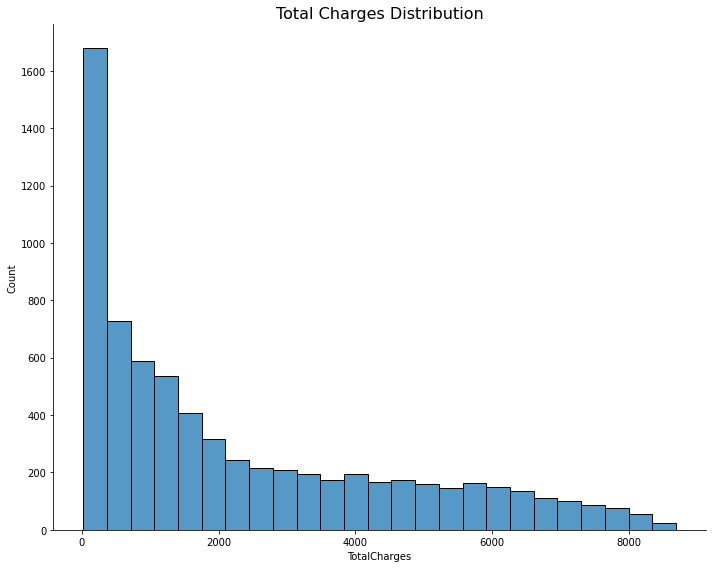

In [778]:
# your code goes here!

df = pd.read_csv('csv/telco_customer.csv')
pd.set_option('display.max_columns', 999)
df.head()

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
#df.info()
#df.head()

dfcustomer = pd.DataFrame(df.customerID.unique())
# Asumsi : setiap customer ID hanya memiliki satu payment menthod

plt.figure(figsize=(10,8))
#sns.distplot(df['TotalCharges'], hist=False, kde=True)      # --> distribusi tapi ada error #
sns.histplot(df['TotalCharges'])
sns.despine()

plt.title('Total Charges Distribution', fontsize = 16) # nama figure
plt.tight_layout(); 

In [326]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Jadi, dari plot di atas, dapat disimpulkan bahwa distribusi total charges tidak membentuk grafik distribusi normal melainkan positively skewed, hal tersebut menyebabkan sebagian besar total charges (75%) berada dibawah 37xx dollar. Grafik diatas juga menendakan nilai median dari totalcharges akan lebih kecil daripada nilai mean atau rata-ratanya.

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

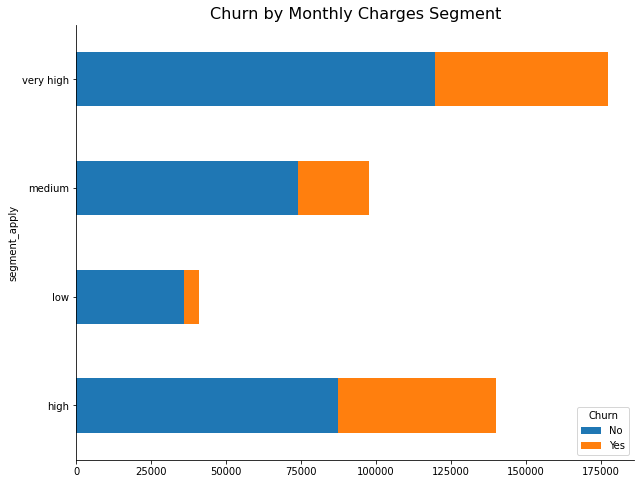

In [779]:
# your code goes here!

df = pd.read_csv('csv/telco_customer.csv')
pd.set_option('display.max_columns', 999)
df.head()

#sns.histplot(df['MonthlyCharges'])
plt.show()

def segment(x):
    if x['MonthlyCharges'] > 89.850000:
        segment = 'very high'
    elif x['MonthlyCharges'] >70.350000  and x['MonthlyCharges'] < 89.850000:
        segment = 'high'
    elif x['MonthlyCharges'] >35.500000 and x['MonthlyCharges'] < 70.350000:
        segment = 'medium'
    else:
        segment = 'low'
    return segment # pembagian segmen monthly charges berdasarkan q1, q2 dan q3 (0 s.d q1 = low, q1 s.d q2 = med, dst..)

df['segment_apply'] = df.apply(lambda x: segment(x), axis=1)
#df

df_z = df.groupby(['segment_apply', 'Churn'])['MonthlyCharges'].sum().reset_index()
#df_z

df_new = df_z.pivot_table(index='segment_apply', columns='Churn', values='MonthlyCharges')
#df_new

df_new.plot(kind='barh',stacked=True, figsize=(10,8))
plt.title('Churn by Monthly Charges Segment', fontsize = 16)
sns.despine();

Jadi, dari plot di atas, dapat disimpulkan bahwa pada monthly charges yang tergolong high & very high (diatas 70.350000), kecenderungan customer untuk churn lebih besar daripada monthly charges pada segment low dan medium. Namun kecenderungan tersebut masih dibawah 50% dari jumlah per segment nya.

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

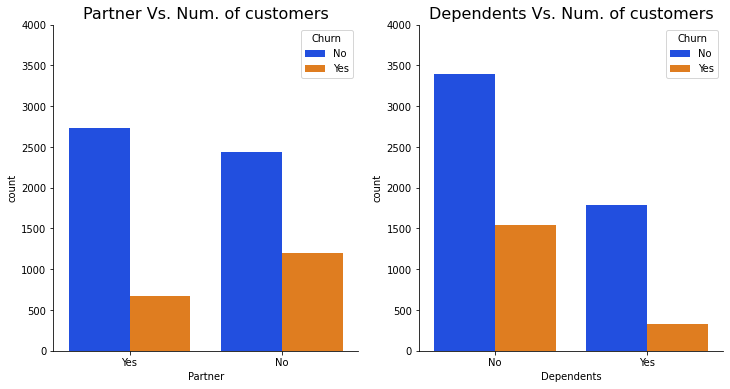

In [781]:
# your code goes here!

df = pd.read_csv('csv/telco_customer.csv')
pd.set_option('display.max_columns', 999)
df.head(1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Partner' , data=df, hue='Churn', palette='bright')
sns.despine()
plt.title('Partner Vs. Num. of customers', fontsize = 16)
plt.ylim(0, 4000)

plt.subplot(1,2,2)
sns.countplot(x='Dependents' , data=df, hue='Churn', palette='bright')
sns.despine()
plt.title('Dependents Vs. Num. of customers', fontsize = 16)
plt.ylim(0, 4000)

plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa kecenderungan customer yang memiliki partner untuk churn merupakan yang paling kecil pada grafik jumlah partner vs. Num of customer. Begitu pun customer yang dependents pada grafik dependents vs. Num of customer

# Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut!

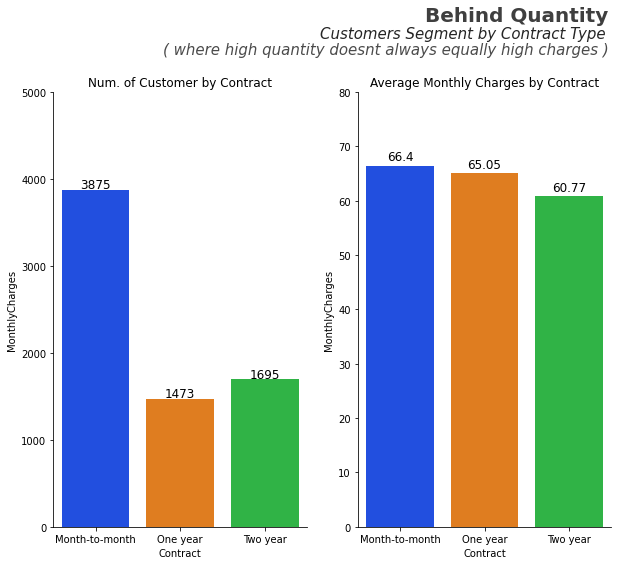

In [783]:
dfcustomer = pd.DataFrame(df.customerID.unique())
# Asumsi : setiap customer ID hanya memiliki satu payment menthod

# plot 1
df_PaymentMethod = df.groupby('Contract')['MonthlyCharges'].count().reset_index() # agregasi monthlycharge

x = df_PaymentMethod['Contract']
y = df_PaymentMethod['MonthlyCharges'].round(2)

plt.figure(figsize=(10,8)) # ukuran figure
plt.subplot(1,2,1)
plt.bar(x=x, height=y) 
graph = sns.barplot(x = 'Contract', y= 'MonthlyCharges', data=df_PaymentMethod, palette='bright') # barplot
sns.despine()

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+20, s = str(y[i]), size = 12, ha='center') # data points

plt.ylim(0, 5000) # limit sumbu y
plt.title('Num. of Customer by Contract', fontsize = 12)

# plot 2
df_PaymentMethod = df.groupby('Contract')['MonthlyCharges'].mean().reset_index() # agregasi monthlycharge

x = df_PaymentMethod['Contract']
y = df_PaymentMethod['MonthlyCharges'].round(2)

plt.subplot(1,2,2)
plt.bar(x=x, height=y) 
graph = sns.barplot(x = 'Contract', y= 'MonthlyCharges', data=df_PaymentMethod, palette='bright') # barplot
sns.despine()

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i], y = y[i]+1, s = str(y[i]), size = 12, ha='center') # data points
plt.ylim(0, 80) # limit sumbu y
plt.title('Average Monthly Charges by Contract', fontsize = 12)

graph.text(x = 0.3, y = 93, s = "Behind Quantity",
               fontsize = 20, weight = 'bold', alpha = .75)
graph.text(x = -0.95, y = 90, s = 'Customers Segment by Contract Type',
              fontsize = 15, style = 'italic', alpha = .85)
graph.text(x = -2.8, y = 87, s = '( where high quantity doesnt always equally high charges )',
              fontsize = 15, style = 'italic', alpha = .70)

plt.show()

Berdasarkan visualisasi diatas, jika kita melihat jumlah customer dan tipe kontrak saja, kesimpulan yang cenderung akan muncul adalah bahwa customer dengan tipe kontrak month-to-month mendominasi transaksi namun pada jika dilihat dari monthlycharges dan tipe kontrak, customer dengan tipe kontrak month-to-month hanya sedikit unggul dari tipe kontrak lainnya yang menandakan bahwa meskipun jumlahnya sedikit, tipe kontrak one dan two-year memberikan milai transaksi yang hampir sama dengan tipe kontrak month-to-month

### PS: maaf mas saya baca pdf nya pas mau kumpulin hehe

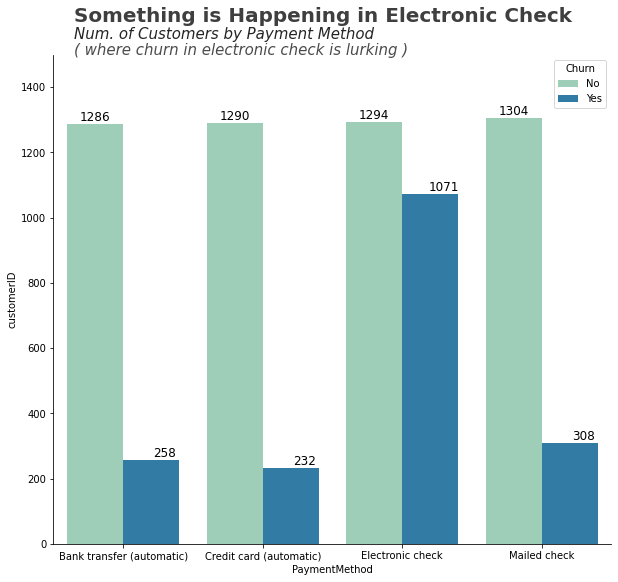

In [785]:
dfcustomer = pd.DataFrame(df.customerID.unique())
# Asumsi : setiap customer ID hanya memiliki satu payment menthod

df_PaymentMethod = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().reset_index() # agregasi monthlycharge

x = df_PaymentMethod['PaymentMethod']
y = df_PaymentMethod['customerID']

plt.figure(figsize=(10,9)) # ukuran figure
#plt.subplot(1,2,1)
#plt.bar(x=x, height=y) 
graph = sns.barplot(x = 'PaymentMethod', y= 'customerID', data=df_PaymentMethod, hue='Churn', palette='YlGnBu') # barplot
sns.despine()

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = ((x_numbers[i]/2)-0.2), y = y[i]+10, s = str(y[i]), size = 12, ha='center') # data points

plt.ylim(0, 1500) # limit sumbu y
graph.text(x = -0.35, y = 1600, s = "Something is Happening in Electronic Check",
               fontsize = 20, weight = 'bold', alpha = .75)
graph.text(x = -0.35, y = 1550, s = 'Num. of Customers by Payment Method',
              fontsize = 15, style = 'italic', alpha = .85)
graph.text(x = -0.35, y = 1500, s = '( where churn in electronic check is lurking )',
              fontsize = 15, style = 'italic', alpha = .70)

plt.show()

Berdasarkan visualisasi diatas, jika kita melihat jumlah customer dan tipe kontrak saja, jumlah customer yang loyal pada setiap kategori payment method cenderung sama, namun customer dengan electronic check memiliki kecenderungan untuk churn paling tinggi sementara pada metode bayar lainnya kecenderungan untuk churn sekitar 20%-30%